This Jupyter notebook provides an example on how to analyze Netlogo data with Python. It is based on Chris Davis' analysis of Netlogo data in R that can be found [here](https://cbdavis.github.io/Demo-Analyzing-Netlogo-Data-with-R/NetLogoDataDemo.html). In particular, we use the same data file.

In [26]:
#Load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [27]:
# We start by reading in the file generated by Netlogo's behaviorspace.
Basecase = pd.read_csv('!Reusevariation_new.csv', skiprows=6, low_memory=False)
Basecasenormal = pd.read_csv('!Reusevariation_new.csv', skiprows=6, low_memory=False)

In [28]:
# Ok, let's see what it looks like. Display the first 5 rows
Basecase[:5]

,[run number],Possession-wears-average,Social-influence-radius,Random-seed?,Segment-influence,Rebound?,Seed,Price-influence,Social-influence-threshold,Increase-only-for-high-values?,...,Value-of-price-modification,[step],service-lifespan,new-consumption,wears,owners,reused-textiles-percentage,textiles-in-closet,reused-textiles-average,new-textiles-average
0,7,77,13,False,5,True,200,5,5,False,...,0,0,2.574896,0.0,37.358405,1.0,0.0,130.0,0.0,130.0
1,3,77,13,False,5,True,200,5,5,False,...,0,0,2.637750,0.0,39.140764,1.0,0.0,130.0,0.0,130.0
2,8,77,13,False,5,True,200,5,5,False,...,0,0,2.718269,0.0,40.783160,1.0,0.0,130.0,0.0,130.0
3,5,77,13,False,5,True,200,5,5,False,...,0,0,2.566643,0.0,39.547174,1.0,0.0,130.0,0.0,130.0
4,7,77,13,False,5,True,200,5,5,False,...,0,1,2.581603,0.0,37.439081,1.0,0.0,129.8,0.0,129.8


In [29]:
Basecase['[step]'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0              0
1              0
2              0
3              0
4              1
           ...  
2803629    27445
2803630    27446
2803631    27447
2803632    27448
2803633    27449
Name: [step], Length: 2803634, dtype: int64>

In [30]:
# Rename two column names
Basecase.rename(columns={'Reuse-percentage-fixed':'Reuse percentage [%]','[run number]':'run_number','[step]':'tick', 'reuse-percentage-fixed':'Reuse-percentage'}, inplace=True)
Basecasenormal.rename(columns={'Reuse-percentage-fixed':'Reuse percentage [%]','[run number]':'run_number','[step]':'tick', 'reuse-percentage-fixed':'Reuse-percentage'}, inplace=True)
Basecasenormal['year']=Basecasenormal['tick'].div(365)

In [31]:
Basecase['service-lifespan-1']=2*Basecase['service-lifespan']
Basecasenormal['service-lifespan-1']=2*Basecasenormal['service-lifespan']

Basecase['wears-1']=2*Basecase['wears']
Basecasenormal['wears-1']=2*Basecasenormal['wears']

In [32]:
Basecase.drop(Basecase[Basecase['tick'] < 5475].index, inplace = True)

Basecase['year1']=Basecase['tick'].div(365)
Basecase['year']=Basecase['year1']-15
Basecase[0:100]

,run_number,Possession-wears-average,Social-influence-radius,Random-seed?,Segment-influence,Rebound?,Seed,Price-influence,Social-influence-threshold,Increase-only-for-high-values?,...,wears,owners,reused-textiles-percentage,textiles-in-closet,reused-textiles-average,new-textiles-average,service-lifespan-1,wears-1,year1,year
42304,2,77,13,False,5,True,200,5,5,False,...,17.980182,1.0,0.0,183.4,0.0,175.6,5.861560,35.960364,15.000000,0.000000
42313,2,77,13,False,5,True,200,5,5,False,...,17.997153,1.0,0.0,183.4,0.0,175.6,5.867039,35.994305,15.002740,0.002740
42321,2,77,13,False,5,True,200,5,5,False,...,18.013113,1.0,0.0,183.2,0.0,175.4,5.867793,36.026226,15.005479,0.005479
42328,2,77,13,False,5,True,200,5,5,False,...,18.030217,1.0,0.0,183.2,0.0,175.4,5.873273,36.060433,15.008219,0.008219
42335,2,77,13,False,5,True,200,5,5,False,...,18.004000,1.0,0.0,182.8,0.0,175.0,5.862638,36.008000,15.010959,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42755,7,77,13,False,5,True,200,5,5,False,...,19.004353,1.0,0.0,178.0,0.0,170.0,5.949782,38.008706,15.093151,0.093151
42758,2,77,13,False,5,True,200,5,5,False,...,18.133982,1.0,0.0,182.6,0.0,174.8,5.888273,36.267963,15.167123,0.167123
42761,7,77,13,False,5,True,200,5,5,False,...,19.022000,1.0,0.0,178.0,0.0,170.0,5.955262,38.044000,15.095890,0.095890
42766,2,77,13,False,5,True,200,5,5,False,...,18.151144,1.0,0.0,182.6,0.0,174.8,5.893753,36.302288,15.169863,0.169863


In [33]:
Basecase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197500 entries, 42304 to 2803633
Data columns (total 45 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   run_number                         int64  
 1   Possession-wears-average           int64  
 2   Social-influence-radius            int64  
 3   Random-seed?                       bool   
 4   Segment-influence                  int64  
 5   Rebound?                           bool   
 6   Seed                               int64  
 7   Price-influence                    int64  
 8   Social-influence-threshold         int64  
 9   Increase-only-for-high-values?     bool   
 10  Yearly-textile-consumption-avg     int64  
 11  Possession-span-stdev              int64  
 12  Social-influence                   float64
 13  Disposal-feedback?                 bool   
 14  Number-consumers                   int64  
 15  Lifetime-decrease-reuse            int64  
 16  Value-change  

In [34]:
#Basecase['Reuse percentage [%]'].max

In [35]:
check = np.linspace(start = 0, stop = 100, num = 100).astype(int)
Basecase_short = Basecase[Basecase['year'].isin(check)]
Basecasenormal_short = Basecasenormal[Basecasenormal['year'].isin(check)]

# Short database

In [36]:
Basecasenormal_short['year'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0           0.0
1           0.0
2           0.0
3           0.0
5           0.0
           ... 
2802573    75.0
2802664    73.0
2802803    75.0
2803194    74.0
2803559    75.0
Name: year, Length: 7773, dtype: float64>

Text(0.5, 1.0, 'Reuse percentage reuse variation')

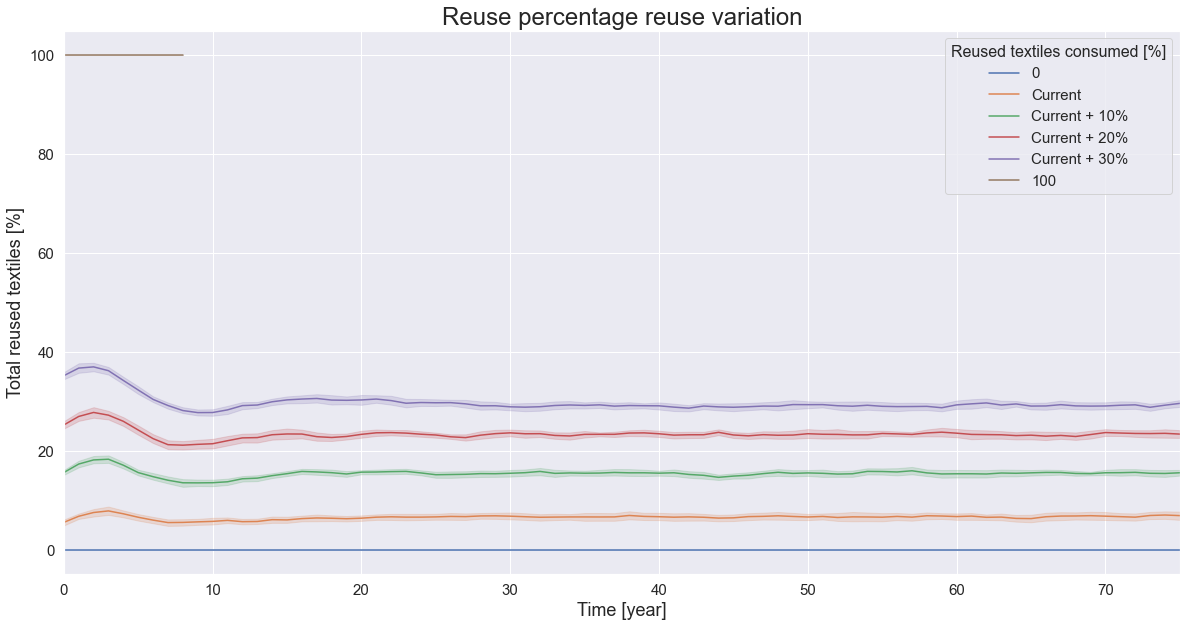

In [37]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'reused-textiles-percentage', hue = 'Reuse percentage [%]', legend = 'full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Total reused textiles [%]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 75)
plt.legend(title = "Reused textiles consumed [%]", fontsize=15, title_fontsize = 16)
plt.title("Reuse percentage reuse variation", fontsize = 24)

Text(0.5, 1.0, 'New textile consumption reuse variation')

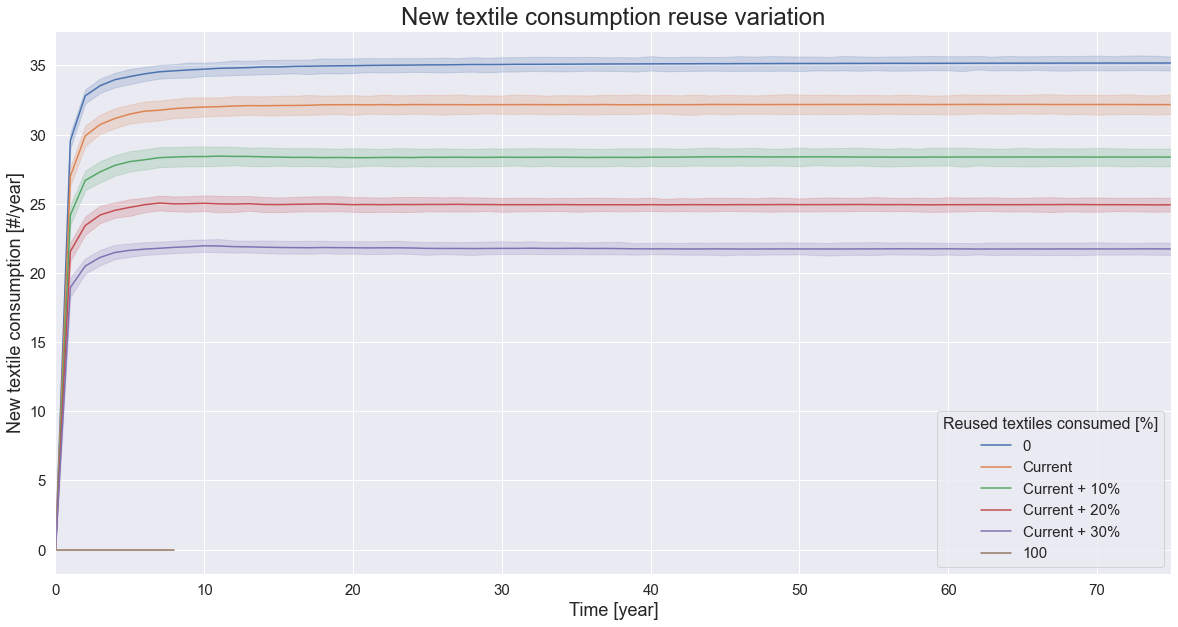

In [38]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'new-consumption', hue = 'Reuse percentage [%]', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("New textile consumption [#/year]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title = "Reused textiles consumed [%]", fontsize=15, title_fontsize = 16)
plt.xlim(0, 75)
plt.title("New textile consumption reuse variation", fontsize = 24)

Text(0.5, 1.0, 'Textile service lifespan Basecase')

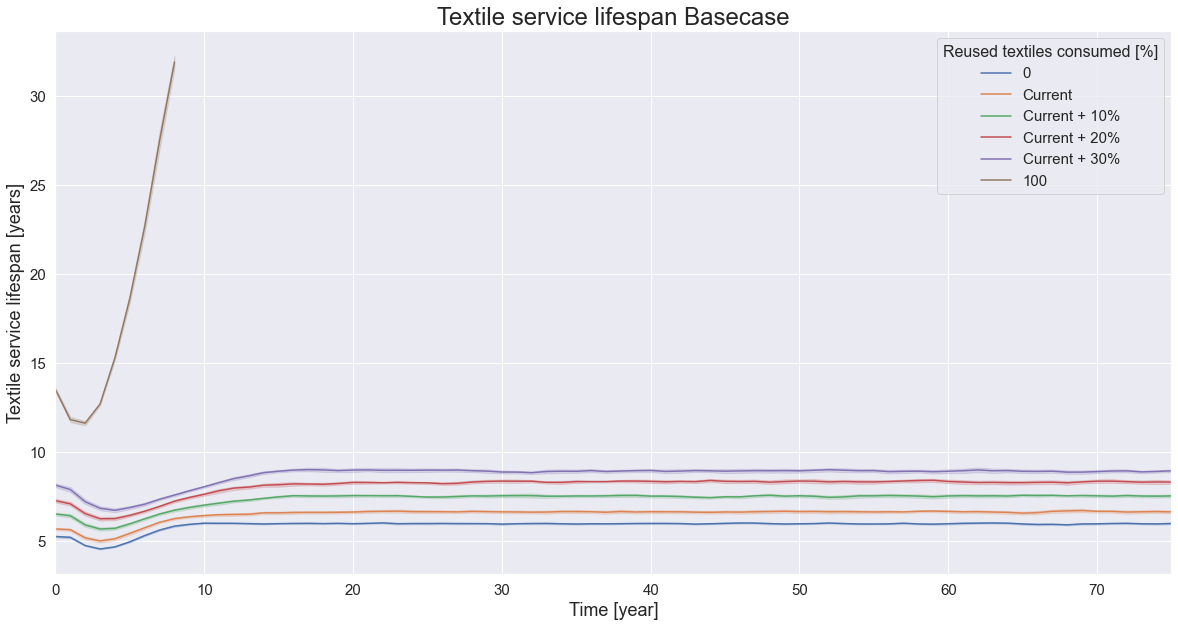

In [39]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'service-lifespan-1',hue = 'Reuse percentage [%]', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Textile service lifespan [years]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title = "Reused textiles consumed [%]", fontsize=15, title_fontsize = 16)
plt.xlim(0, 75)
plt.title("Textile service lifespan Basecase", fontsize = 24)

Text(0.5, 1.0, 'Reuse variation owners')

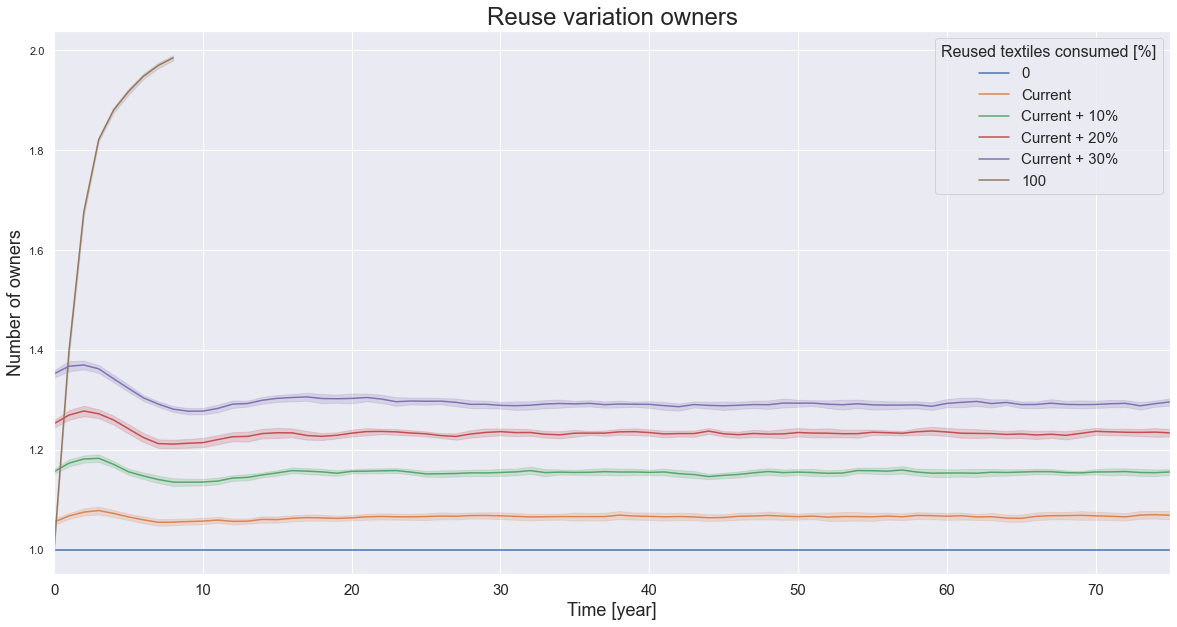

In [40]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'owners', hue = 'Reuse percentage [%]', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Number of owners", fontsize=18)
plt.xticks(fontsize=15)
plt.xlim(0, 75)
plt.legend(title = "Reused textiles consumed [%]", fontsize=15, title_fontsize = 16)
#plt.ylim(1.06,1.12)
plt.title("Reuse variation owners", fontsize = 24)

Text(0.5, 1.0, 'Number of textile wears Basecase')

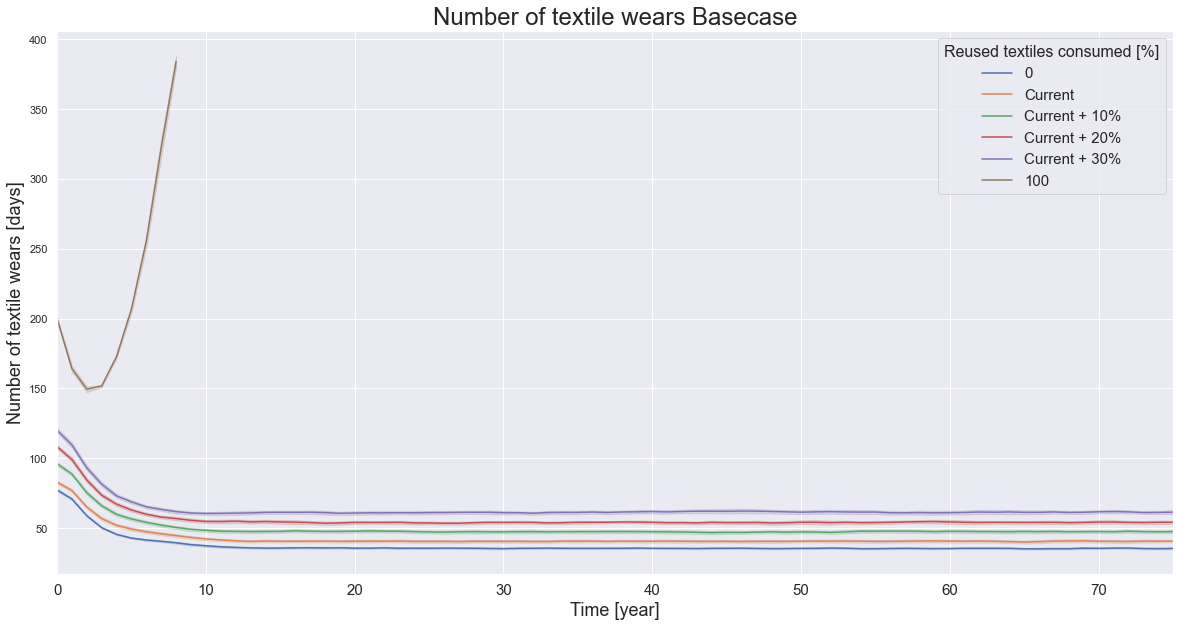

In [41]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'wears-1', hue = 'Reuse percentage [%]', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Number of textile wears [days]", fontsize=18)
plt.xticks(fontsize=15)
plt.xlim(0, 75)
plt.legend(title = "Reused textiles consumed [%]", fontsize=15, title_fontsize = 16)
#plt.ylim(1.06,1.12)
plt.title("Number of textile wears Basecase", fontsize = 24)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Current + 10%'),
  Text(3, 0, 'Current + 20%'),
  Text(4, 0, 'Current + 30%')])

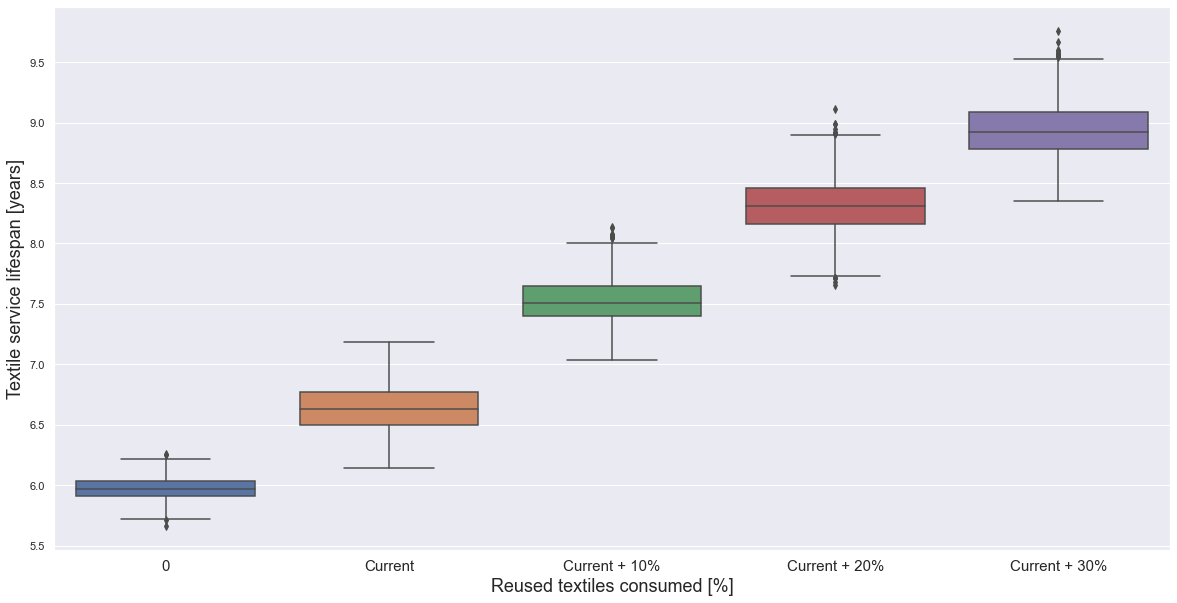

In [42]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(data=Basecase_short, y ='service-lifespan-1', x = 'Reuse percentage [%]')
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('Textile service lifespan [years]', fontsize=18)
plt.xticks(fontsize=15)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Current + 10%'),
  Text(3, 0, 'Current + 20%'),
  Text(4, 0, 'Current + 30%')])

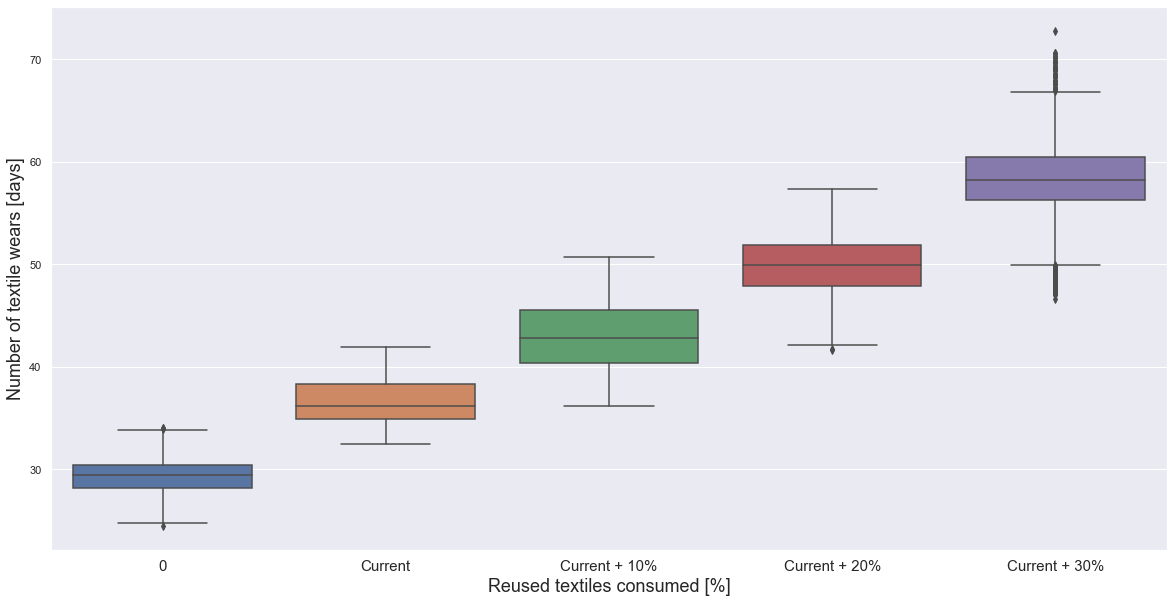

In [25]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(data=Basecase_short, y ='wears-1', x = 'Reuse percentage [%]')
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('Number of textile wears [days]', fontsize=18)
plt.xticks(fontsize=15)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Current + 10%'),
  Text(3, 0, 'Current + 20%'),
  Text(4, 0, 'Current + 30%')])

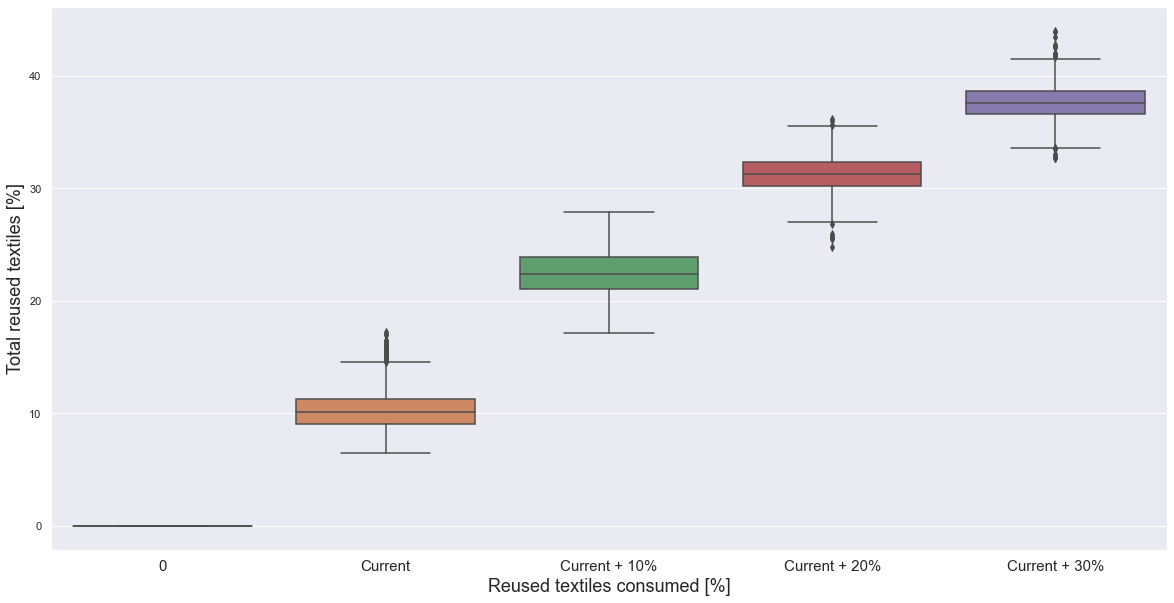

In [188]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(data=Basecase_short, y ='reused-textiles-percentage', x = 'Reuse percentage [%]')
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('Total reused textiles [%]', fontsize=18)
plt.xticks(fontsize=15)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Current + 10%'),
  Text(3, 0, 'Current + 20%'),
  Text(4, 0, 'Current + 30%')])

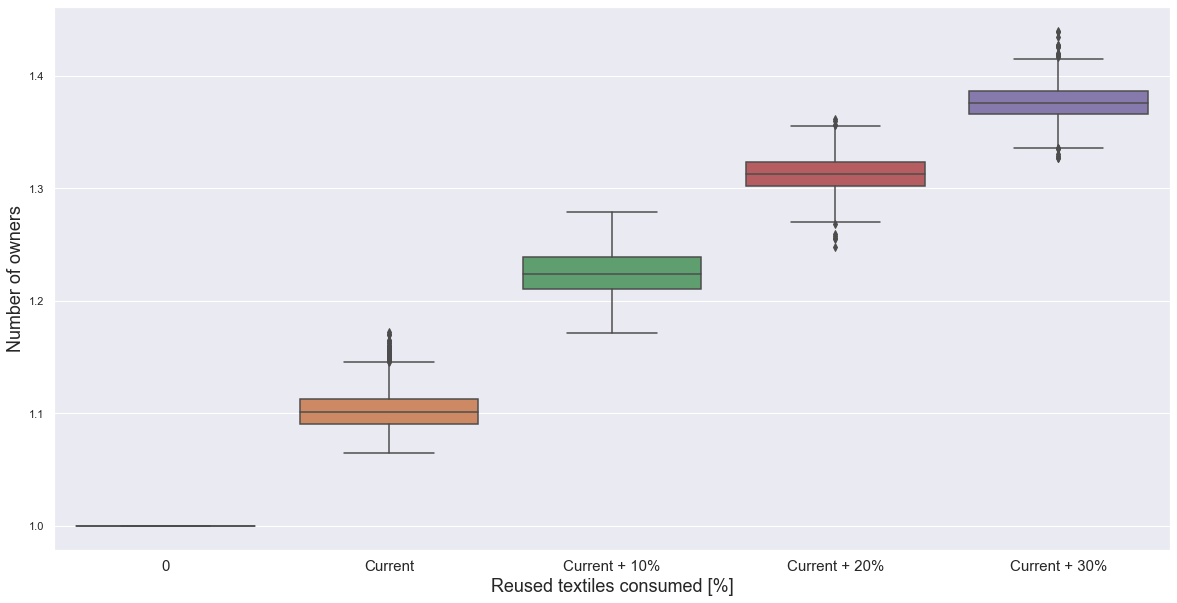

In [182]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(data=Basecase_short, y ='owners', x = 'Reuse percentage [%]')
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('Number of owners', fontsize=18)
plt.xticks(fontsize=15)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Current + 10%'),
  Text(3, 0, 'Current + 20%'),
  Text(4, 0, 'Current + 30%')])

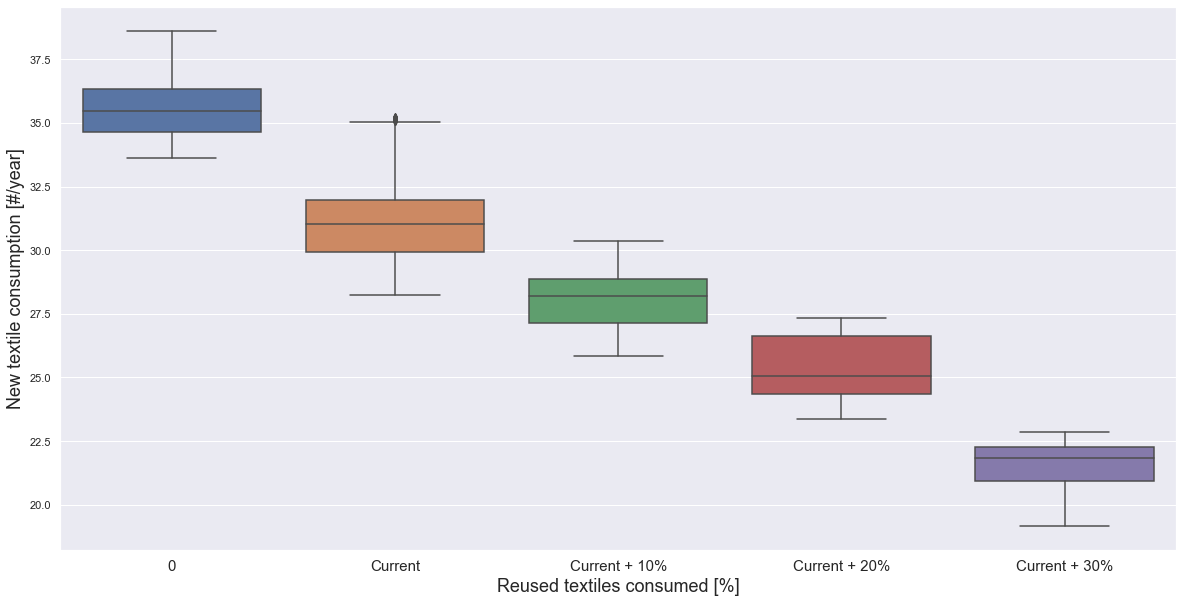

In [35]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(data=Basecase_short, y ='new-consumption', x = 'Reuse percentage [%]')
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('New textile consumption [#/year]', fontsize=18)
plt.xticks(fontsize=15)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Current + 10%'),
  Text(3, 0, 'Current + 20%'),
  Text(4, 0, 'Current + 30%'),
  Text(5, 0, '100')])

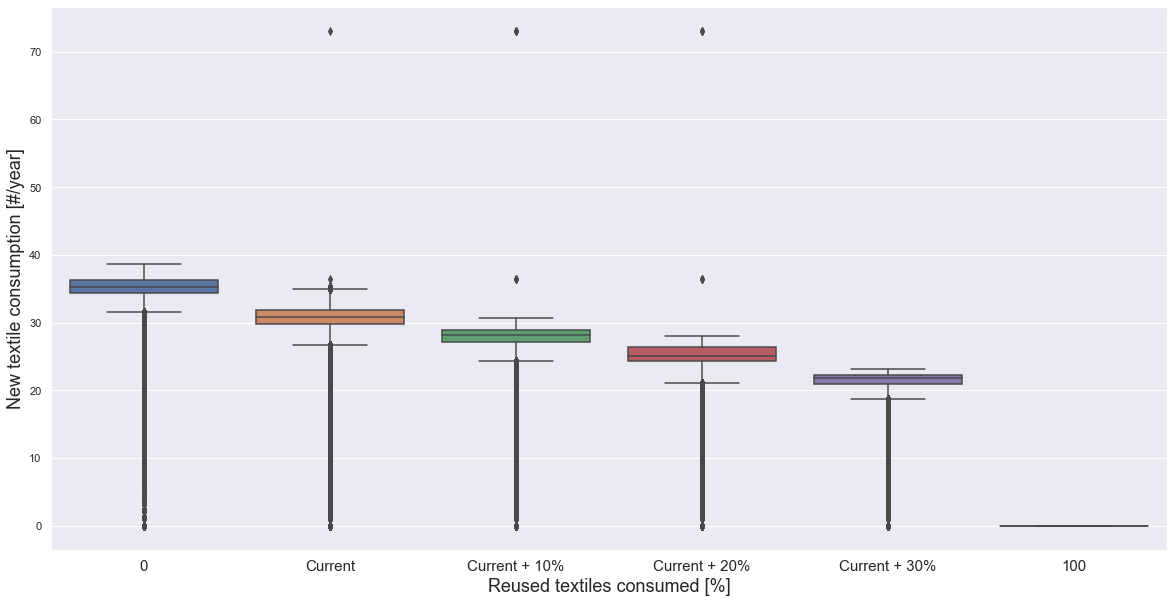

In [34]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(data=Basecasenormal, y ='new-consumption', x = 'Reuse percentage [%]')
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('New textile consumption [#/year]', fontsize=18)
plt.xticks(fontsize=15)